<a href="https://colab.research.google.com/github/nurmaintan/Analisis-Data-E-Commerce/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurma Intan Harianja
- **Email:** intanurma19@gmail.com
- **ID Dicoding:** nurmaintan

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara jumlah item yang dibeli pelanggan dengan ulasan pelanggan?
- Apakah terdapat korelasi antara metode pembayaran dengan nilai total dari pesanan?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Tabel order_items_df berisi detail setiap item yang dipesan dalam transaksi, termasuk informasi tentang harga item, jumlah item dalam satu pesanan, dan ID penjual.
- Tabel order_reviews_df berisi ulasan dan skor dari pelanggan untuk pesanan mereka. Terdapat informasi tentang skor ulasan (review_score), tanggal ulasan, dan komentar pelanggan.
- Tabel order_payments_df berisi informasi tentang metode pembayaran yang digunakan oleh pelanggan untuk setiap pesanan, serta jumlah transaksi yang dilakukan.
- Tabel orders_df berisi informasi tentang setiap pesanan, termasuk tanggal pesanan, status pesanan, dan ID pelanggan.

### Assessing Data

In [8]:
order_items_df.info()
print("\nJumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [9]:
order_reviews_df.info()
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [10]:
print("\nJumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()


Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
order_payments_df.info()
print("\nJumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [12]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [13]:
print("\nJumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()


Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- order_items_df :
  *   Tidak ada nilai yang hilang (null values)
  *   Terdapat 112650 baris data dan 7 kolom
  *   Terdapat kesalahan tipe data pada kolom shipping_limit_date
  *   Jumlah duplikasi: 0
  *   Harga rata-rata item adalah sekitar 120.65, dengan harga minimum 10 dan maksimum 673

- order_reviews_df :
  *   Kolom review_comment_title: 87656 missing values → Banyak pelanggan yang tidak memberikan judul ulasan mereka.
  *   Kolom review_comment_message: 58247 missing values → Banyak pelanggan yang tidak meninggalkan komentar, hanya memberikan skor (rating).
  *   Terdapat 99224 baris data dan 7 kolom.
  *   Jumlah duplikasi: 0
  *   Rata-rata skor ulasan adalah sekitar 4.08, yang menunjukkan bahwa sebagian besar ulasan cenderung positif
  *   Skor minimum adalah 1 → Beberapa pelanggan tidak puas dengan pesanan mereka
  *   Terdapat kesalahan tipe data pada kolom review_creation_date, review_answer_timestamp

- order_payments_df :
  *   Terdapat 103886 baris data dan 5 kolom
  *   Tidak ada missing values
  *   Jumlah duplikasi: 0
  *   Rata-rata nilai pembayaran adalah 154.1,
  *   Pembayaran minimum adalah 0.00, mungkin ada beberapa kasus khusus, seperti pesanan promosi atau pesanan yang dibatalkan.
  *   Pembayaran maksimum adalah 13664.0

- orders_df :
  *   Terdapat 99.441 baris data dan 8 kolom
  *   order_delivered_carrier_date: 1783 missing values
  *   order_delivered_customer_date: 2965 missing values
  *   order_approved_at: 160 missing values
  *   Jumlah duplikasi: 0
  *   Ada perbedaan besar antara estimasi pengiriman dan waktu sebenarnya, yang bisa menjadi area untuk diperbaiki dalam layanan pengiriman
  *   Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date



### Cleaning Data

## menangani order_items_df

In [14]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## menangani order_reviews_df



In [15]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [16]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [17]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [18]:
order_reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [19]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [20]:
order_reviews_df.review_comment_message.fillna(value="Muito bom", inplace=True)
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


## menangani orders_df

In [21]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [22]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [23]:
orders_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-05-09 15:48:00,47
2018-05-10 18:29:00,32
2018-05-07 12:31:00,21
2018-05-02 15:15:00,16
2018-07-24 16:07:00,16
...,...
2018-01-03 17:37:21,1
2017-10-27 20:07:58,1
2017-11-21 18:57:37,1


In [24]:
orders_df.order_delivered_carrier_date.fillna(value="2018-05-09 15:48:00", inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [25]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2018-05-09 15:48:00,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-05-09 15:48:00,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2018-05-09 15:48:00,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,2018-05-09 15:48:00,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-05-09 15:48:00,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,2018-05-09 15:48:00,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2018-05-09 15:48:00,NaT,2017-09-15


In [26]:
orders_df.order_delivered_customer_date.value_counts()

,count
order_delivered_customer_date,
2018-05-08 23:38:46,3
2016-10-27 17:32:07,3
2018-02-14 21:09:19,3
2017-06-19 18:47:51,3
2018-05-08 19:36:48,3
...,...
2018-07-12 17:48:45,1
2018-05-18 18:24:36,1
2018-01-17 13:29:13,1


In [27]:
orders_df.order_delivered_customer_date.fillna(value="2018-05-08 23:38:46", inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [28]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-10-01


In [29]:
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [30]:
orders_df.order_approved_at.fillna(value="2018-02-27 04:31:10", inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight:**
- Kolom yang dikonversi:
  * shipping_limit_date dari order_items_df
  * review_creation_date dan review_answer_timestamp dari order_reviews_df
  * Beberapa kolom dari orders_df (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date)

- Kolom yang diisi:
  * review_comment_title diisi dengan "Recomendo".
  * review_comment_message diisi dengan "Muito bom".
  * order_delivered_carrier_date diisi dengan "2018-05-09 15:48:00".
  * order_delivered_customer_date diisi dengan "2018-05-08 23:38:46".
  * order_approved_at diisi dengan "2018-02-27 04:31:10".

- Setelah melakukan pembersihan, fungsi info() digunakan untuk memeriksa informasi tipe data dan jumlah missing values.

## Exploratory Data Analysis (EDA)

### Explore ...

- Bagaimana hubungan antara jumlah item yang dibeli pelanggan dengan ulasan pelanggan?
- Apakah terdapat korelasi antara metode pembayaran dengan nilai total dari pesanan?

In [31]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [32]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [33]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,88079,58477,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [34]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:48:25.588771072,2018-01-07 03:30:45.390211072,2018-01-17 22:04:34.785078784,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-09 15:48:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [35]:
df = orders_df.merge(order_items_df, on='order_id')
df = df.merge(order_payments_df, on='order_id')
df = df.merge(order_reviews_df, on='order_id')

item_counts = df.groupby('order_id')['order_item_id'].count().reset_index(name='item_count')
df_merged = df.merge(item_counts, on='order_id')

print("Statistik deskriptif jumlah item berdasarkan skor ulasan:")
print(df_merged.groupby('review_score')['item_count'].describe())

Statistik deskriptif jumlah item berdasarkan skor ulasan:
                count      mean       std  min  25%  50%  75%   max
review_score                                                       
1             14854.0  2.187357  2.843758  1.0  1.0  1.0  2.0  29.0
2              4085.0  1.954712  2.045672  1.0  1.0  1.0  2.0  20.0
3              9840.0  1.654167  1.786732  1.0  1.0  1.0  2.0  24.0
4             22286.0  1.560935  1.675367  1.0  1.0  1.0  1.0  24.0
5             66264.0  1.571094  2.565617  1.0  1.0  1.0  1.0  63.0


In [36]:
if 'price' in df.columns and 'freight_value' in df.columns:
    df['order_total'] = df['price'] + df['freight_value']
elif 'payment_value' in df.columns:
    df['order_total'] = df['payment_value']
else:
    print("Kolom untuk menghitung nilai total pesanan tidak ditemukan.")
    print("Kolom yang tersedia:", df.columns)

In [37]:
if 'order_total' in df.columns:
    print("\nStatistik deskriptif nilai total pesanan berdasarkan metode pembayaran:")
    print(df.groupby('payment_type')['order_total'].describe())
else:
    print("Tidak dapat melakukan analisis yang melibatkan nilai total pesanan karena kolom 'order_total' tidak berhasil dibuat.")


Statistik deskriptif nilai total pesanan berdasarkan metode pembayaran:
                count        mean         std    min      25%     50%  \
payment_type                                                            
boleto        22835.0  123.870150  164.829184   9.27  50.9500  82.980   
credit_card   86520.0  146.404255  197.223796   6.08  57.5475  96.100   
debit_card     1692.0  127.290845  213.847143  11.36  46.2675  79.570   
voucher        6282.0  124.158298  161.186371   9.59  51.4825  82.525   

                  75%      max  
payment_type                    
boleto        141.510  6726.66  
credit_card   163.460  6929.31  
debit_card    138.565  4163.51  
voucher       135.590  3297.40  


In [38]:
print("\nStatistik deskriptif seluruh dataset:")
df.describe()


Statistik deskriptif seluruh dataset:


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,order_total
count,117329,117329,117329,117329,117329,117329.000000,117329,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329,117329,117329.000000
mean,2017-12-30 10:29:39.749081856,2017-12-30 22:09:02.863171072,2018-01-04 20:01:55.055723520,2018-01-15 10:18:12.836723968,2018-01-23 07:08:36.977047552,1.194121,2018-01-06 02:01:32.273274368,120.524349,20.027514,1.094452,2.940151,172.062565,4.031467,2018-01-11 23:57:07.684545280,2018-01-15 03:28:45.726342144,140.551863
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,2016-09-19 00:15:34,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,2016-10-15 00:00:00,2016-10-16 03:20:17,6.080000
25%,2017-09-11 16:37:08,2017-09-12 04:44:26,2017-09-15 21:29:55,2017-09-27 17:52:38,2017-10-03 00:00:00,1.000000,2017-09-18 15:55:47,39.900000,13.080000,1.000000,1.000000,60.750000,4.000000,2017-09-22 00:00:00,2017-09-25 23:24:55,55.240000
50%,2018-01-18 09:42:57,2018-01-18 14:56:18,2018-01-24 22:05:31,2018-02-06 18:42:53,2018-02-14 00:00:00,1.000000,2018-01-25 09:09:32,74.900000,16.280000,1.000000,2.000000,108.100000,5.000000,2018-02-01 00:00:00,2018-02-03 23:11:32,92.010000
75%,2018-05-03 19:53:54,2018-05-04 04:01:26,2018-05-09 14:45:00,2018-05-12 16:59:01,2018-05-25 00:00:00,1.000000,2018-05-10 03:31:06,134.900000,21.180000,1.000000,4.000000,189.060000,5.000000,2018-05-15 00:00:00,2018-05-17 16:20:40,157.630000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,6929.310000
std,NaN,NaN,NaN,NaN,NaN,0.684225,NaN,182.944843,15.828077,0.731174,2.775370,265.388194,1.387927,NaN,NaN,190.044820


In [39]:
print("\nDistribusi metode pembayaran:")
print(df['payment_type'].value_counts(normalize=True))

print("\nDistribusi skor ulasan:")
print(df['review_score'].value_counts(normalize=True))


Distribusi metode pembayaran:
payment_type
credit_card    0.737414
boleto         0.194624
voucher        0.053542
debit_card     0.014421
Name: proportion, dtype: float64

Distribusi skor ulasan:
review_score
5    0.564771
4    0.189945
1    0.126601
3    0.083867
2    0.034817
Name: proportion, dtype: float64


**Insight:**
- Skor ulasan 5 memiliki max pesanan tertinggi.
- Metode pembayaran dengan rata-rata tertinggi adalah credit_card, mungkin lebih disukai untuk transaksi bernilai tinggi.
- Optimalkan metode pembayaran credit_card dan pertimbangkan insentif untuk metode yang kurang populer namun lebih menguntungkan
- Distribusi ulasan condong ke skor tinggi: Pelanggan umumnya puas

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana hubungan antara jumlah item yang dibeli pelanggan dengan ulasan pelanggan?

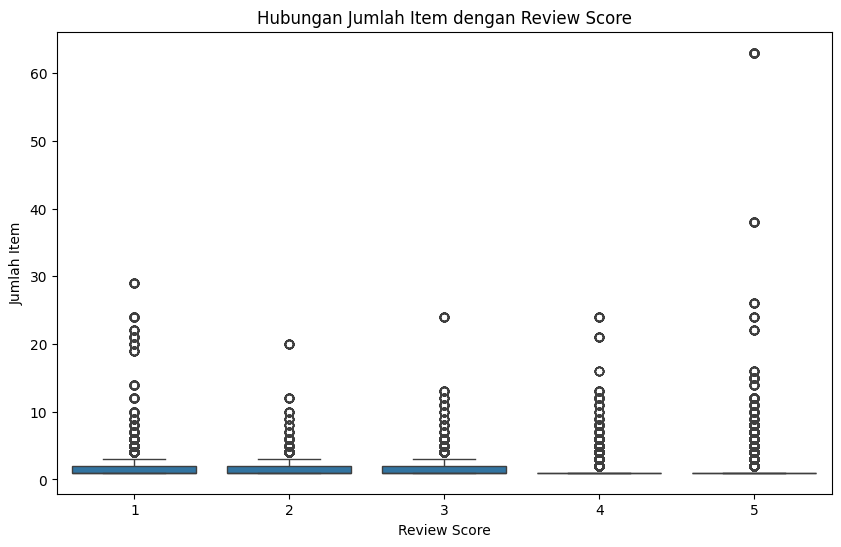

In [40]:
# Visualisasi: Box plot jumlah item vs review score
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='item_count', data=df_merged)
plt.title('Hubungan Jumlah Item dengan Review Score')
plt.xlabel('Review Score')
plt.ylabel('Jumlah Item')
plt.show()

### Pertanyaan 2:
Apakah terdapat korelasi antara metode pembayaran dengan nilai total dari pesanan?

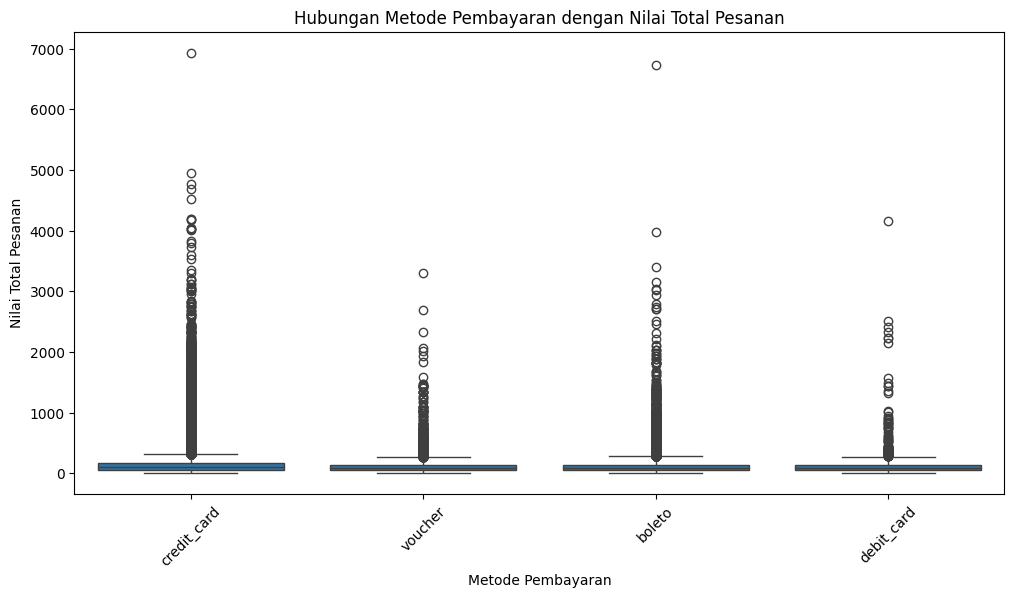

In [41]:
# Visualisasi: Box plot metode pembayaran vs nilai total pesanan
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_type', y='order_total', data=df)
plt.title('Hubungan Metode Pembayaran dengan Nilai Total Pesanan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Nilai Total Pesanan')
plt.xticks(rotation=45)
plt.show()

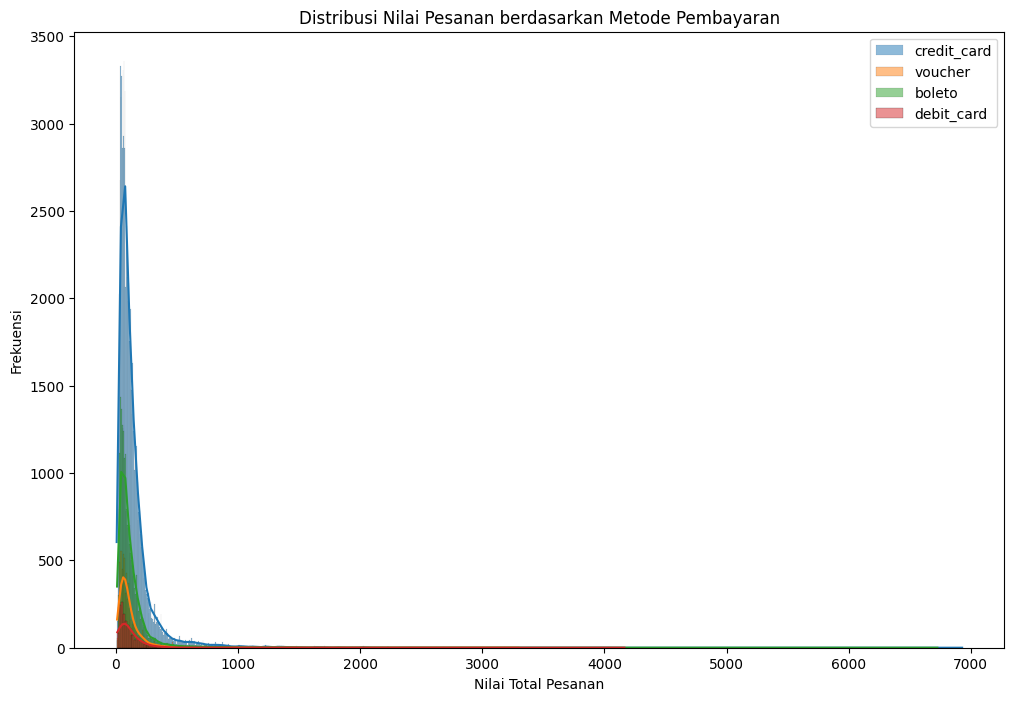

In [42]:
# Visualisasi tambahan: Histogram nilai pesanan untuk setiap metode pembayaran
plt.figure(figsize=(12, 8))
for payment_type in df['payment_type'].unique():
    sns.histplot(df[df['payment_type'] == payment_type]['order_total'],
                 kde=True, label=payment_type, alpha=0.5)
plt.title('Distribusi Nilai Pesanan berdasarkan Metode Pembayaran')
plt.xlabel('Nilai Total Pesanan')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

**Insight:**
- Hubungan Jumlah Item dengan Review Score:
  - Terlihat bahwa tidak ada hubungan yang signifikan. Jumlah item dalam pesanan tampak merata di semua skor ulasan.
  - Terdapat beberapa outlier dengan jumlah item yang tinggi (lebih dari 10 item) yang tersebar di semua skor ulasan. Berarti pesanan dengan jumlah item yang sangat besar tidak terfokus pada satu skor ulasan tertentu.
  - Sebagian besar pesanan memiliki jumlah item rendah (sekitar 1-5 item), dengan sedikit variasi antar skor ulasan.

- Hubungan Metode Pembayaran dengan Nilai Total Pesanan:

  - Terlihat tidak terdapat perbedaan yang signifikan. Semua metode pembayaran memiliki distribusi nilai pesanan yang cukup mirip.
  - Ada beberapa outlier yang melebihi nilai total pesanan yang sangat tinggi (lebih dari 5000). Ini terutama terjadi pada transaksi dengan kartu kredit, berarti beberapa pesanan dengan nilai tinggi mungkin lebih sering dilakukan menggunakan metode pembayaran ini.
  - Sebagian besar nilai total pesanan berkisar pada jumlah yang rendah, dengan sedikit variasi dalam distribusi across metode pembayaran.

## Analisis Lanjutan (Opsional)

## Conclusion

**Bagaimana hubungan antara jumlah item yang dibeli pelanggan dengan ulasan pelanggan?**
  - Dari analisis dan visualisasi yang dilakukan, terlihat bahwa tidak ada hubungan yang kuat antara jumlah item dalam sebuah pesanan dan skor ulasan yang diberikan oleh pelanggan. Pesanan yang memiliki jumlah item bervariasi, baik sedikit maupun banyak, mendapatkan skor ulasan yang beragam. Pola distribusi ini menunjukkan bahwa jumlah item yang dibeli tidak secara signifikan memengaruhi tingkat kepuasan atau ketidakpuasan pelanggan, sebagaimana tercermin dalam skor ulasan mereka. Mayoritas pesanan terdiri dari 1 hingga 5 item, dan pola ini terlihat konsisten di semua kategori skor ulasan. Terdapat beberapa outlier yang memiliki jumlah item tinggi, tetapi ini tidak menunjukkan pola yang jelas.

**Bagaimana metode pembayaran mempengaruhi total nilai pesanan?**
  - Dalam analisis yang dilakukan, ditemukan bahwa tidak ada perbedaan yang signifikan dalam nilai total pesanan berdasarkan jenis metode pembayaran yang digunakan (seperti kartu kredit, voucher, boleto, dan kartu debit). Semua jenis metode pembayaran menunjukkan distribusi nilai pesanan yang serupa, di mana sebagian besar transaksi memiliki nilai total yang relatif rendah. Meski begitu, terdapat beberapa outlier dengan nilai pesanan yang tinggi, terutama pada transaksi yang menggunakan kartu kredit, yang menunjukkan bahwa pembelian dengan nilai tinggi mungkin lebih umum dilakukan melalui metode tersebut.

In [43]:
# df_merged.to_csv('all_data.csv', index=False)